In [ ]:
!pip install langchain_community
!pip install replicate

In [ ]:
from langchain_community.llms import Replicate
from google.colab import userdata
import os

api_token = userdata.get("api_token")
os.environ["REPLICATE_API_TOKEN"] = api_token

In [ ]:
parameters = {
  "top_k": 5,
  "top_p": 1.0,
  "max_tokens": 4096,
  "min_tokens": 0,
  "random_seed": None,
  "repetition_penalty": 1.0,
  "temperature": 0.7,
  "stopping_criteria": "length (256 tokens)",
  "stopping_sequence": None
}

# Define LLM
llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    input=parameters
)

In [ ]:
output = llm.invoke("when world war 2?")

print(output)

World War II took place from September 1, 1939, to September 2, 1945. It began when Germany, under Adolf Hitler, invaded Poland. The war ended with the unconditional surrender of the Axis powers.


In [ ]:
list_1 = [1, 3, 5, 6, 2, 6, 2, 9]

In [ ]:
data = [
    "With millions of fans watching his every move as IShowSpeed, Darren Watkins Jr. has made a name for himself as a streamer. At just 19 years old, his online presence is growing rapidly.",
    "Known for his lightning-fast footwork on the field, Antony Mateus plays professionally as a football player. He's 25, and already considered one of the rising stars in his league.",
    "The name Barack Obama is etched in history. Now 63, the former president continues to inspire through his speeches and books.",
    "After years behind bars, Lucia is back on the streets of Vice City at 29. She is ready to reclaim her life, navigating crime and chaos as a fierce criminal in the heart of GTA 6.",
    "Selling out stadiums across the world, Taylor Swift is far more than just a 34-year-old singer. Her influence spans music, fashion, and culture."
]

In [ ]:
for row in data:
  print("Review:")
  print(row)
  print() #ini enter
  prompt = f"""from that info i want you to change the information to JSON. Extract like, name, job and age


  {row}"""
  print("Prompt:")
  print(prompt)
  print()
  output = llm.invoke(prompt)
  print("Output:")
  print(output)
  print()
  print()
  print("---------------------------------")


Review:
With millions of fans watching his every move as IShowSpeed, Darren Watkins Jr. has made a name for himself as a streamer. At just 19 years old, his online presence is growing rapidly.

Prompt:
from that info i want you to change the information to JSON. Extract like, name, job and age


  With millions of fans watching his every move as IShowSpeed, Darren Watkins Jr. has made a name for himself as a streamer. At just 19 years old, his online presence is growing rapidly.

Output:
{
  "name": "Darren Watkins Jr.",
  "alias": "IShowSpeed",
  "job": "streamer",
  "age": 19
}


---------------------------------
Review:
Known for his lightning-fast footwork on the field, Antony Mateus plays professionally as a football player. He's 25, and already considered one of the rising stars in his league.

Prompt:
from that info i want you to change the information to JSON. Extract like, name, job and age


  Known for his lightning-fast footwork on the field, Antony Mateus plays professiona

In [ ]:
!pip install pandas
!pip install -U langchain langchain-community langchain-experimental replicate

In [ ]:
import pandas as pd

# Membaca file diabetes.csv yang telah diunggah
data = pd.read_csv("diabetes.csv")
data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
from langchain_experimental.agents.agent_toolkits.pandas.base import (
    create_pandas_dataframe_agent
)
import pandas as pd

agent = create_pandas_dataframe_agent(
    llm=llm,
    df=data,
    verbose=True,
    allow_dangerous_code=True,
    handle_parsing_errors=True
)

/usr/local/lib/python3.11/dist-packages/langchain_experimental/agents/agent_toolkits/pandas/base.py:283: UserWarning: Received additional kwargs {'handle_parsing_errors': True} which are no longer supported.
  warnings.warn(


In [ ]:
agent.invoke({"input": "What is the average age of patients who have diabetes?"})




> Entering new AgentExecutor chain...
Thought: To find the average age of patients who have diabetes, I need to filter the dataframe to only include rows where the 'Diabetes' column (assumed to be named 'Outcome') is 1 (indicating diabetes), and then calculate the mean of the 'Age' column.

Action: python_repl_ast

Action Input: 
```python
avg_age_diabetes = df[df['Outcome'] == 1]['Age'].mean()
print(avg_age_diabetes)
```

37.06716417910448
Final Answer: The average age of patients who have diabetes (where 'Outcome' = 1) is approximately 37.07 years.

Final Answer: 37.07

> Finished chain.


{'input': 'What is the average age of patients who have diabetes?',
 'output': '37.07'}

In [ ]:
agent.invoke({"input": "What is the average Glucose level of patients with diabetes?"})



> Entering new AgentExecutor chain...
Thought: To find the average Glucose level of patients with diabetes, I need to filter the DataFrame `df` for rows where the `Outcome` column is 1 (indicating diabetes), and then compute the mean of the `Glucose` column in those filtered rows.

Action: python_repl_ast

Action Input: 
```python
avg_glucose_diabetes = df[df['Outcome'] == 1]['Glucose'].mean()
avg_glucose_diabetes
```

141.25746268656715Final Answer: The average Glucose level of patients with diabetes is approximately 141.26. 

Explanation: 
I filtered the DataFrame `df` for rows where `Outcome` (indicating diagnosis of diabetes) is 1 and computed the mean of the `Glucose` column in those filtered rows. The calculated mean is approximately 141.26.

> Finished chain.


{'input': 'What is the average Glucose level of patients with diabetes?',
 'output': 'The average Glucose level of patients with diabetes is approximately 141.26. \n\nExplanation: \nI filtered the DataFrame `df` for rows where `Outcome` (indicating diagnosis of diabetes) is 1 and computed the mean of the `Glucose` column in those filtered rows. The calculated mean is approximately 141.26.'}



> Entering new AgentExecutor chain...
Thought: To create a bar chart comparing the average BMI of diabetic vs non-diabetic patients, I need to filter the dataframe `df` based on the 'Outcome' column and then calculate the average BMI for both groups. After that, I will use matplotlib or seaborn to create the bar chart.

Action: python_repl_ast

Action Input:
```python
import matplotlib.pyplot as plt
import seaborn as sns

# Filter dataframe based on 'Outcome'
diabetic_df = df[df['Outcome'] == 1]
non_diabetic_df = df[df['Outcome'] == 0]

# Calculate average BMI for both groups
avg_bmi_diabetic = diabetic_df['BMI'].mean()
avg_bmi_non_diabetic = non_diabetic_df['BMI'].mean()

# Create bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=['Diabetic', 'Non-diabetic'], y=[avg_bmi_diabetic, avg_bmi_non_diabetic])
plt.title('Average BMI Comparison: Diabetic vs Non-diabetic Patients')
plt.xlabel('Outcome')
plt.ylabel('Average BMI')
plt.show()
```



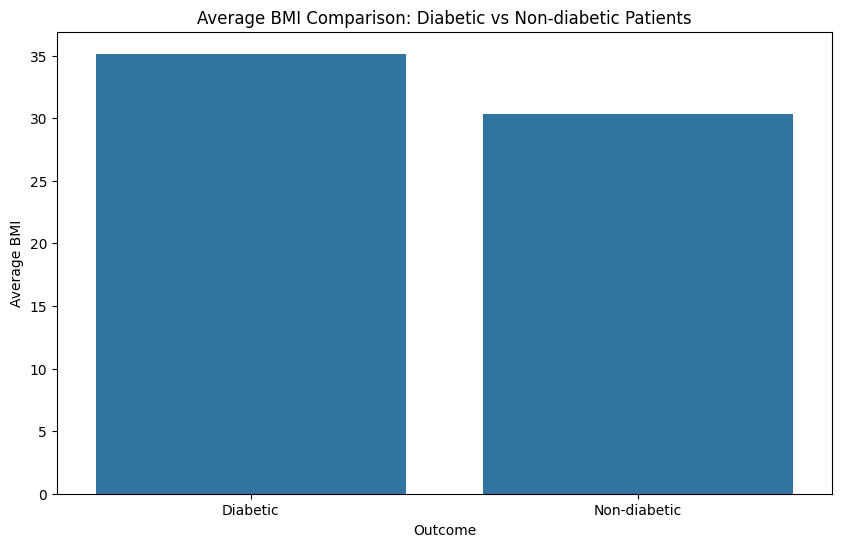

ModelError: Director: unexpected error handling prediction (E8765)

In [ ]:
agent.invoke({"input": "Please make a bar chart comparing average BMI of diabetic vs non-diabetic patients using the 'Outcome' column"})

In [ ]:
!pip install langchain_community
!pip install replicate

from langchain_community.llms import Replicate
from google.colab import userdata
import os

api_token = userdata.get("api_token")
os.environ["REPLICATE_API_TOKEN"] = api_token

parameters = {
  "top_k": 5,
  "top_p": 1.0,
  "max_tokens": 4096,
  "min_tokens": 0,
  "random_seed": None,
  "repetition_penalty": 1.0,
  "temperature": 0.7,
  "stopping_criteria": "length (256 tokens)",
  "stopping_sequence": None
}

# Define LLM
llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    model_kwargs=parameters
)

output = llm.invoke("when world war 2?")

print(output)

list_1 = [1, 3, 5, 6, 2, 6, 2, 9]

data = [
    "With millions of fans watching his every move as IShowSpeed, Darren Watkins Jr. has made a name for himself as a streamer. At just 19 years old, his online presence is growing rapidly.",
    "Known for his lightning-fast footwork on the field, Antony Mateus plays professionally as a football player. He's 25, and already considered one of the rising stars in his league.",
    "The name Barack Obama is etched in history. Now 63, the former president continues to inspire through his speeches and books.",
    "After years behind bars, Lucia is back on the streets of Vice City at 29. She is ready to reclaim her life, navigating crime and chaos as a fierce criminal in the heart of GTA 6.",
    "Selling out stadiums across the world, Taylor Swift is far more than just a 34-year-old singer. Her influence spans music, fashion, and culture."
]

for row in data:
  print("Review:")
  print(row)
  print() #ini enter
  prompt = f"""from that info i want you to change the information to JSON. Extract like, name, job and age


  {row}"""
  print("Prompt:")
  print(prompt)
  print()
  output = llm.invoke(prompt)
  print("Output:")
  print(output)
  print()
  print()
  print("---------------------------------")

!pip install pandas
!pip install -U langchain langchain-community langchain-experimental replicate

import pandas as pd

# Membaca file diabetes.csv yang telah diunggah
data = pd.read_csv("diabetes.csv")
data

from langchain_experimental.agents.agent_toolkits.pandas.base import (
    create_pandas_dataframe_agent
)
import pandas as pd
from langchain_community.llms import Replicate
from google.colab import userdata
import os

api_token = userdata.get("api_token")
os.environ["REPLICATE_API_TOKEN"] = api_token

parameters = {
  "top_k": 5,
  "top_p": 1.0,
  "max_tokens": 4096,
  "min_tokens": 0,
  "random_seed": None,
  "repetition_penalty": 1.0,
  "temperature": 0.7,
  "stopping_criteria": "length (256 tokens)",
  "stopping_sequence": None
}

# Define LLM
llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    model_kwargs=parameters
)


agent = create_pandas_dataframe_agent(
    llm=llm,
    df=data,
    verbose=True,
    allow_dangerous_code=True,  # opt-in for Python REPL execution
)

agent.invoke({"input": "What is the average age of patients who have diabetes?"})

agent.invoke({"input": "What is the average Glucose level of patients with diabetes?"})

agent.invoke({"input": "Please make a bar chart comparing average BMI of diabetic vs non-diabetic patients using the 'Outcome' column"})